                   country  normalization  number     count
0              Philippines     100.000000     0.0  0.023554
1                   Canada      69.024857     1.0  0.029183
2                Singapore      58.699809     2.0  0.028576
3                  Ireland      57.361377     3.0  0.022115
4                Australia      55.258126     4.0  0.013526
..                     ...            ...     ...       ...
245                  Tonga       0.000000     NaN       NaN
246                 Tuvalu       0.000000     NaN       NaN
247  U.S. Outlying Islands       0.000000     NaN       NaN
248           Vatican City       0.000000     NaN       NaN
249        Wallis & Futuna       0.000000     NaN       NaN

[250 rows x 4 columns]


(0.0, 9.0, -0.003, 0.030715479971998978)

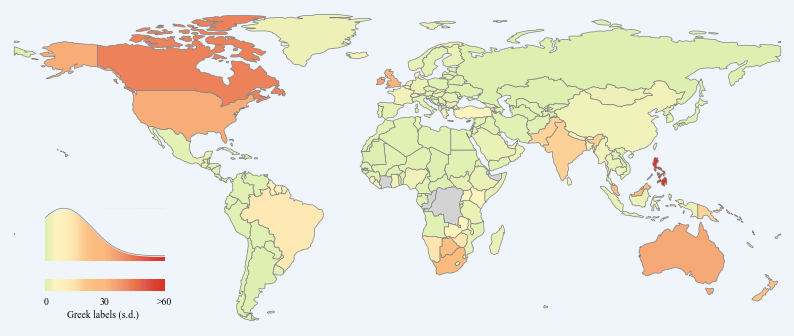

In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline

shapefile = 'bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'
import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# #Drop row corresponding to 'Antarctica'
datafile = 'bokeh-app/data/Greek_SUM_Normalization.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data

print(data)


#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)
# Word typical, pass in the personalization parameters related to the layered color.
# In this experiment, the X-axis data range is 0-100, and the interval is 1
color_bin = np.arange(0,101,1)
# print(color_bin)
fig,ax = plt.subplots(figsize = (10,6))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)

plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-113,-48,'>60',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'30',family = 'Times New Roman',fontsize = 7)
plt.text(-155,-54,'Greek labels (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.16, 0.29, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.156,0.27,0.128,0.11])# position[xmin,xmax,ymin,ymax]
# Take the data on the interval (0,60]
# print(data['normalization'][2:193])
# f = ax1.boxplot(
#     # The drawing data
#     x = data['normalization'][2:193],
#     vert = False,
#     widths=0.18,
#     patch_artist=True,
#     boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
#     showcaps=False,
#     flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
#     medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
#     whiskerprops={'color':'gray','linewidth':'0.5'}
#     )

ax1.axis('off')  # Get rid of the scale

x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)

# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale

In [16]:
fig,ax = plt.subplots(figsize = (10,6))
ax1 = fig.add_axes([0.156,0.27,0.128,0.11])# position[xmin,xmax,ymin,ymax]
nor_list = []
for x in data['normalization']:
    if x == 0.0:
        nor_list.append(1.0)
    else:
        nor_list.append(int(x))
for x in nor_list:
    print(type(x))
f = ax1.boxplot(
    # The drawing data
    x = nor_list,
    vert = False,
    widths=0.18,
    patch_artist=True,
    boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
    showcaps=False,
    flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
    medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
    whiskerprops={'color':'gray','linewidth':'0.5'}
    )

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 1000x600 with 2 Axes>